In [1]:
import labtools as lt 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import os
from labtools import scanner
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from labtools import plot_style

In [2]:
folder = "/home/bbuusshh/my_git/data/fiber/pressure1"

In [3]:
scans = pd.DataFrame(os.listdir(os.path.join(folder)), columns=['Name'])

scans = scans.iloc[np.argsort(scag[:,40:140,10:100].sum(axis=2).Tns["Name"].apply(lambda x: int(x[-2:])))]
runim02=
imgs = []
names = []
freqs = []
for scan in scans["Name"]:
    header, raw, freq = scanner.xtract(f"{folder}/{scan}")
    imgs.append(raw)
    names.append(scan)
    freqs.append(freq)

In [4]:
press = imgs[7:15]
freqs_prs = freqs[7:15]
lines_pr0 = press[0]
fr0 = freqs_prs[0]
fr0 = fr0 - fr0[0]
lines_pr1 = press[2]
fr1 = freqs_prs[2]
fr1 = fr1 - fr1[0]
lines_pr2 = press[3]
fr2 = freqs_prs[3]
fr2 = fr2 - fr2[0]
lines_pr3 = press[6]
fr3 = freqs_prs[6]
fr3 = fr3 - fr3[0]
lines_pr4 = press[7]
fr4 = freqs_prs[7]
fr4 = fr4 - fr4[0]
lines_pr5 = press[7][30:]
fr5 = freqs_prs[7][30:]
fr5 = fr5 - fr5[0]
lines_pr6 = press[7][30:]
fr6 = freqs_prs[7][30:]
fr6 = fr6 - fr6[0]

In [5]:
im0 = pd.DataFrame(press[0], columns=fr0)
im1 = pd.DataFrame(press[2], columns=fr1)
im2 = pd.DataFrame(press[3], columns=fr2)
im3 = pd.DataFrame(press[6], columns=fr3)
im4 = pd.DataFrame(press[7], columns=fr4)

In [6]:
def align_im(im, minerr=1000):
    
    errs = np.array([])
    for index, line in im.iterrows():
        
        indx = np.array(line.index)

        peaks, _ = find_peaks((line.values-min(line.values))/np.max(line.values), height=0.5, distance=len(line)*0.9)
        x = np.arange(line.shape[0])
        plt.plot(x[peaks], line.values[peaks],'o')
        if len(peaks) == 0:
            errs = np.append(errs, np.inf)
            continue

        peak = peaks[np.argmax([line.values[peaks]])]
        plt.plot(x[peak], line.values[peak],'o')
        plt.plot(x, line.values,'-')
        p0 = [1000,100,x[peak],np.mean(line)]
        try:
            popt, pcov = curve_fit(scanner.lorentz, x, line, p0)
            perr = np.sqrt(np.diag(pcov)[np.diag(pcov)>0])
            tot_err = perr.sum()
            errs = np.append(errs, tot_err)
            line = np.roll(line, int(-popt[2] + line.shape[0]/2))
            if tot_err < minerr:
                im.iloc[index] = line
                plt.plot(x, scanner.lorentz(x, *popt))
        except:
            print('shit')
            errs = npp.save("paper_plot_filled_2".append(errs, np.inf)
            continue
    return im, errs
   

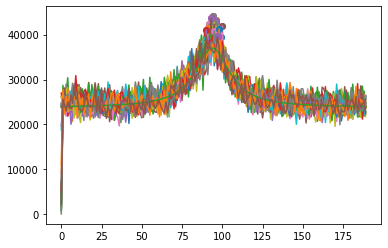

In [7]:
im0, errs0 = align_im(im0)

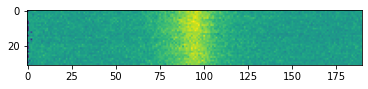

In [8]:
plt.imshow(im0)

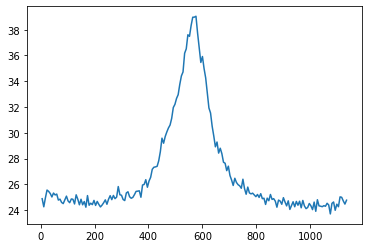

In [9]:
plt.plot(im0.mean(axis=0)[1:]/1000)

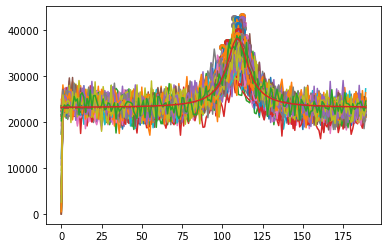

In [10]:
im1, errs1 = align_im(im1)

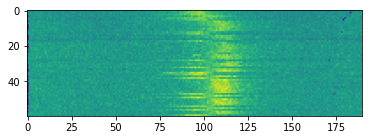

In [11]:
plt.imshow(im1)

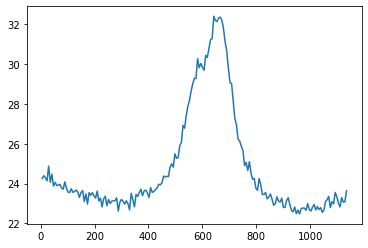

In [12]:
plt.plot(im1.mean(axis=0)[1:]/1000)

In [13]:
im2 = pd.DataFrame(press[3], columns=fr2)

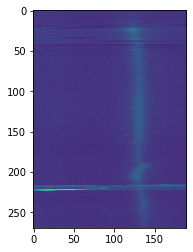

In [14]:
plt.imshow(im2)

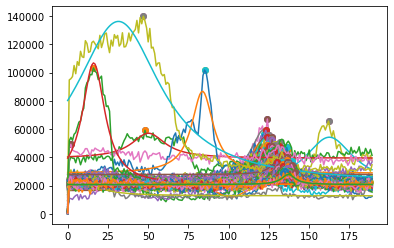

In [15]:
im2, errs2 = align_im(im2, minerr=10000)

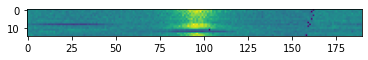

In [16]:
plt.imshow(im2[errs2<4000][20:35])

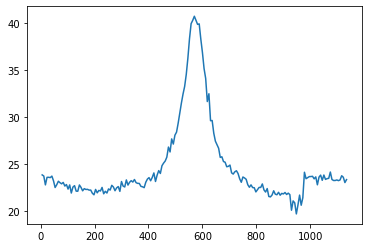

In [17]:
plt.plot(im2[errs2<4000][20:45].mean(axis=0)[1:]/1000)

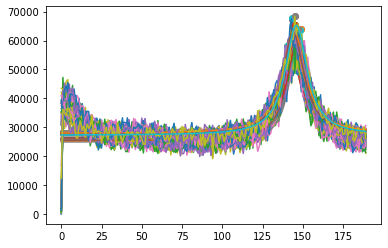

In [18]:
im3, errs3 = align_im(im3, minerr=3000)

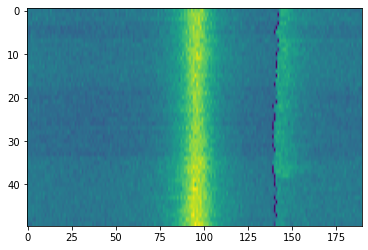

In [19]:
plt.imshow(im3.iloc[errs3<3000], aspect='auto')

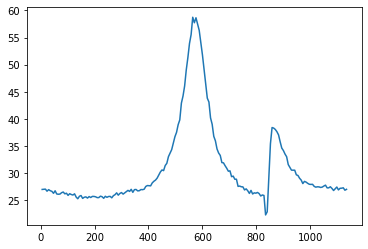

In [20]:
plt.plot(im3.iloc[errs3<3000].mean(axis=0)[1:]/1000)

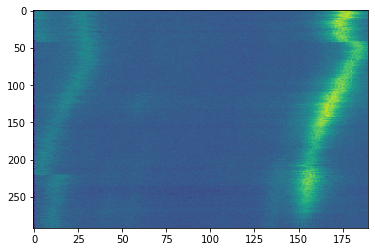

In [21]:
plt.imshow(imgs[15], aspect='auto')

In [22]:
im41 = pd.DataFrame(imgs[15][150:171], columns=fr4)

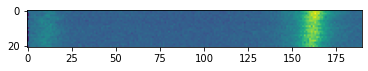

In [23]:
plt.imshow(im41)

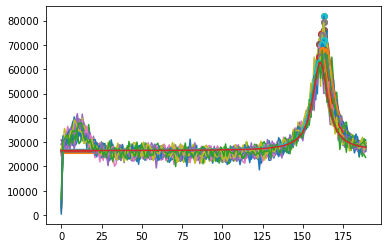

In [24]:
im41, errs41 = align_im(im41, minerr=50000)

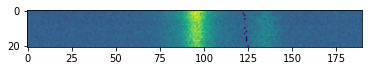

In [25]:
plt.imshow(im41)

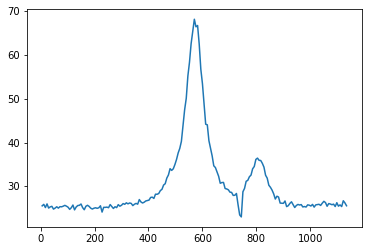

In [26]:
plt.plot(im41.mean(axis=0)[1:]/1000)

In [27]:
im42 = pd.DataFrame(imgs[15][110:126], columns=fr4)

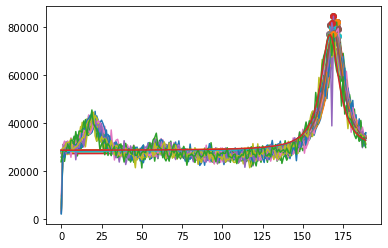

In [28]:
im42, errs42 = align_im(im42, minerr=50000)

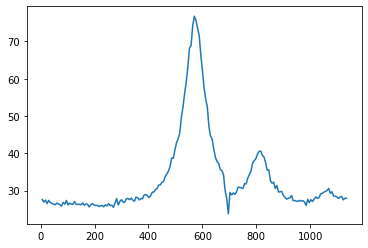

In [29]:
plt.plot(im42.mean(axis=0)[1:]/1000)

In [30]:
im43 = pd.DataFrame(imgs[15][50:65], columns=fr4)

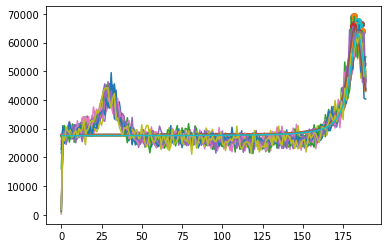

In [31]:
im43, errs43 = align_im(im43, minerr=50000)

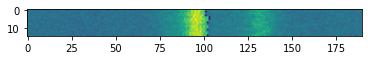

In [32]:
plt.imshow(im43)

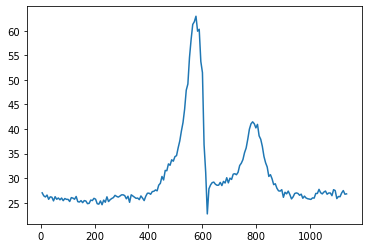

In [33]:
plt.plot(im43.mean(axis=0)[1:]/1000)

# All together


In [34]:
def fit_lorentz(x, y, p0=None):
    if p0 == None:
        peaks, _ = find_peaks((y-min(y))/np.max(y), height=0.5, distance=len(y)*0.9)
        peak = peaks[np.argmax([y[peaks]])]
        p0 = [1000,1000,x[peak],np.mean(y)]
    popt, pcov = curve_fit(scanner.lorentz, x, y, p0)
    perr = np.sqrt(np.diag(pcov)[np.diag(pcov)>0])
    return popt, perr

In [36]:
p = plot_style.plotting()

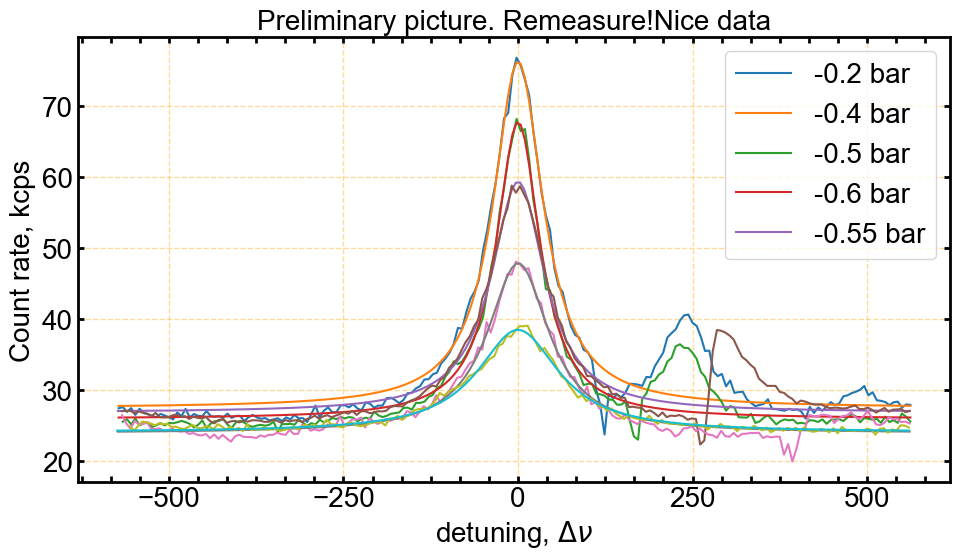

In [38]:

popt42, pcov42 = fit_lorentz(fr4,im42.mean(axis=0).values)
fr4i = fr4- int(popt42[2])
p.plot(xData = fr4i, yData = im42.mean(axis=0)/1000, line='-', 
       xLabel=r"detuning, $\Delta \nu$", 
       yLabel=r"Count rate, kcps",
      title="Preliminary picture. Remeasure!Nice data", tick_step_x=250, ticks_in_between=5)
plt.plot(fr4i, scanner.lorentz(fr4, *popt42)/1000)



popt41, pcov41 = fit_lorentz(fr4,im41.mean(axis=0).values)
fr4ii = fr4- int(popt41[2])
plt.plot(fr4ii[1:], im41.mean(axis=0)[1:]/1000)
plt.plot(fr4ii, scanner.lorentz(fr4, *popt41)/1000)


popt3, pcov3 = fit_lorentz(np.array(im3.iloc[errs3<3000].columns),im3.iloc[errs3<3000].mean(axis=0).values)
fr3i = fr3 - int(popt3[2])
plt.plot(fr3i, scanner.lorentz(fr3, *popt3)/1000)
plt.plot(fr3i[1:], im3.iloc[errs3<3000].mean(axis=0)[1:]/1000)

popt2, pcov2 = fit_lorentz(np.array(im2[errs2<4000][17:30].columns),im2[errs2<4000][17:30].mean(axis=0).values)
fr2i = fr2 - int(popt2[2])
plt.plot(fr2i[1:], im2[errs2<4000][17:30].mean(axis=0)[1:]/1000)

plt.plot(fr2i, scanner.lorentz(fr2, *popt2)/1000)

#we roll im0 by 2 steps, as it is was not perfectly centered:
im02 = im0.copy()
im02 = np.roll(im02, 2)

popt0, pcov0 = fit_lorentz(np.array(im0.columns),im02.mean(axis=0))
fr0i = fr0 - int(popt0[2])
plt.plot(fr0i[3:], im02.mean(axis=0)[3:]/1000)
plt.plot(fr0i, scanner.lorentz(fr0, *popt0)/1000)
plt.legend(['-0.2 bar', '-0.4 bar', '-0.5 bar', '-0.6 bar', '-0.55 bar'], loc='upper right')
plt.tight_layout()
plt.savefig("brightening_with_pressur.pdf")

In [39]:
popt0[1]

-70.88628108118274

In [40]:
popt2[1]

-53.71947989073817

In [41]:
popt3[1]

-46.57782105820058

In [42]:
popt41[1]

-38.34202135119599

In [43]:
popt42[1]

-43.55720627428048